In [ ]:
!pip install tensorflow==2.15.0

In [2]:
# 2.15.0 버전이 나와야 함

import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# json 파일 처리
import json

In [7]:
# 파일 존재 여부 확인용
import os

In [8]:
# Train 데이터에서 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [9]:
# 모델
from tensorflow import keras

In [10]:
# 랜덤숫자 생성
import random

# 변수 목록

In [11]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [12]:
# train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0617/Male/Train/"
# test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0617/Male/Test/"

part_index = 4
part_string = ["Background", "Outer", "Top", "Bottom", "Onepiece"]
train_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0916/Male/" + part_string[part_index] + "/Train/"
test_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0916/Male/" + part_string[part_index] + "/Test/"

img_width = 100
img_height = 100

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명


print(train_dir_name)
print(test_dir_name)

./Dataset/Musinsa_Dataset/Train-Test_0916/Male/Onepiece/Train/
./Dataset/Musinsa_Dataset/Train-Test_0916/Male/Onepiece/Test/


In [13]:
# label_name = ['Gofcore', 'Golf', 'Dandy', 'Romantic', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']
label_name = ['Gofcore', 'Golf', 'Dandy', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']

In [ ]:
# season_name = ['Spring', 'Summer', 'Autumn', 'Winter']

# Train-Test 데이터 불러오기

In [14]:
print(len(os.listdir(train_dir_name + "Image")))
# 5055

5055


In [15]:
print(len(os.listdir(train_dir_name + "Json")))
# 5055

5055


In [16]:
x_train_ori = []
y_train_ori = []

for i in range(0, 5056):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_train_ori.append(img_file_color)
    y_train_ori.append(label_file)


    if len(y_train_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_train_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
Complete


In [17]:
print(len(os.listdir(test_dir_name + "Image")))
# 1248

1248


In [18]:
print(len(os.listdir(test_dir_name + "Json")))
# 1248

1248


In [19]:
x_test = []
y_test_ori = []

for i in range(0, 1249):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    # 이미지 파일 로드
    img_file_color = cv2.imread(img_path)
    if img_file_color is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 이미지 파일을 흑백으로 변환
    # img_file_gray = cv2.cvtColor(img_file_color, cv2.COLOR_BGR2GRAY)


    x_test.append(img_file_color)
    y_test_ori.append(label_file)


    if len(y_test_ori)%500 == 0: # 진행도 확인용
        print(str(len(y_test_ori)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
Complete


# 이미지 확인

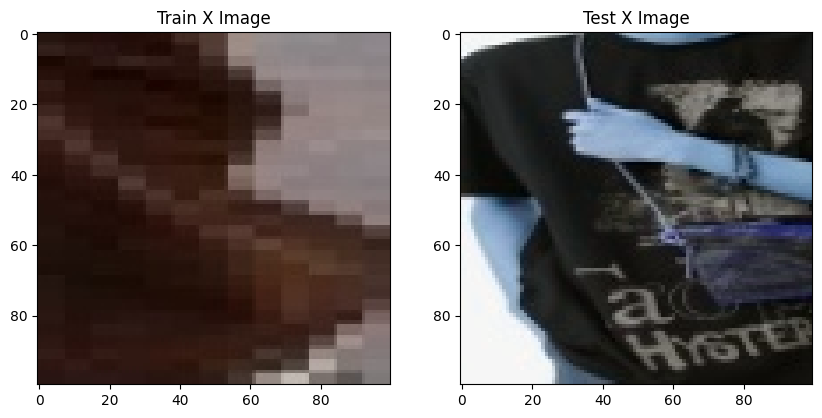

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_train_ori[0])
plt.title("Train X Image")

plt.subplot(1, 2, 2)
plt.imshow(x_test[0])
plt.title("Test X Image")

plt.show()

# 학습을 위해 X,Y데이터 형식 변경

In [21]:
x_train_ori = np.array(x_train_ori)
x_train_ori.shape

(5055, 100, 100, 3)

In [20]:
x_test = np.array(x_test)
x_test.shape

(1248, 100, 100, 3)

In [23]:
y_train = []
season_train = []

for item in y_train_ori:
  label_num = label_name.index(item['Labeling'])

  y_train.append(label_num)
  season_train.append(item["Season"])

print(y_train[0])
print(season_train[0])

0
Spring


In [24]:
y_test = []
season_test = []

for item in y_test_ori:
  label_num = label_name.index(item['Labeling'])

  y_test.append(label_num)
  season_test.append(item["Season"])

print(y_test[0])
print(season_test[0])

0
Summer


In [25]:
y_train = np.array(y_train)
y_train.shape

(5055,)

In [26]:
y_train = y_train.astype('uint8')
y_train.dtype

dtype('uint8')

In [27]:
y_test = np.array(y_test)
y_test.shape

(1248,)

In [28]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# 계절 정보 통계

## Train 계절 통계

In [ ]:
season_count = []

season_count.append(season_train.count('Spring'))
season_count.append(season_train.count('Summer'))
season_count.append(season_train.count('Autumn'))
season_count.append(season_train.count('Winter'))
season_count.append(season_train.count('None'))

print(season_count)

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

## Test 계절 통계

In [ ]:
season_count = []

season_count.append(season_test.count('Spring'))
season_count.append(season_test.count('Summer'))
season_count.append(season_test.count('Autumn'))
season_count.append(season_test.count('Winter'))
season_count.append(season_test.count('None'))

print(season_count)

In [ ]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(season_str, season_count)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, season_count[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(season_count, startangle=90, counterclock=False)
plt.legend(season_str, loc=(1.0, 0.3))

plt.title("Season Count")
plt.show()

# Train 데이터에서 Validation 데이터 분리

In [29]:
y_train_all = y_train[:]

x_train = []
y_train = []
x_val = []
y_val = []

x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_all, test_size=0.25, stratify=y_train_all)

In [30]:
x_train.shape

(3791, 100, 100, 3)

In [31]:
y_train.shape

(3791,)

In [32]:
x_val.shape

(1264, 100, 100, 3)

In [33]:
y_val.shape

(1264,)

# 학습 데이터 통계

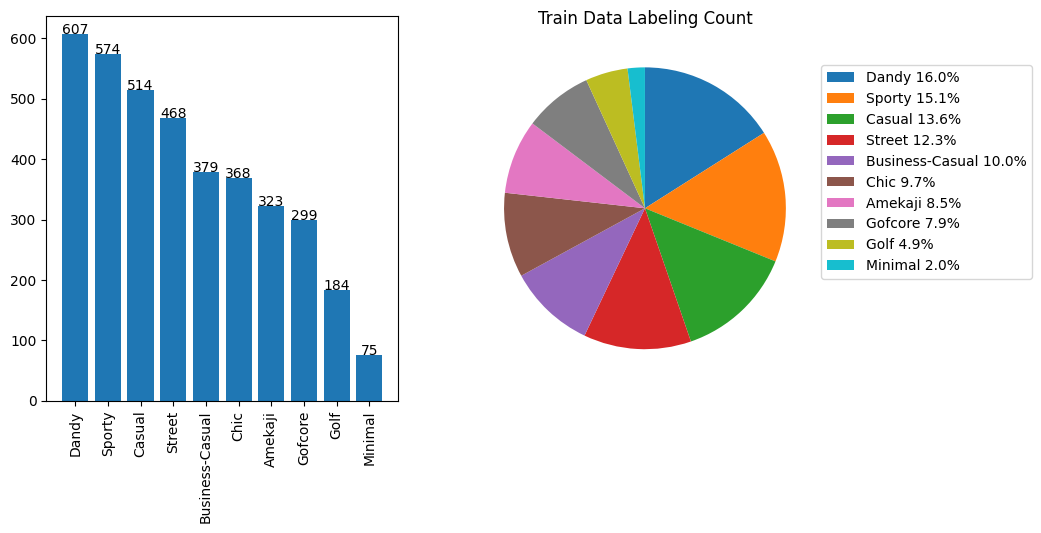

In [34]:
# 라벨 개수 카운트
label_count = {}

for item in y_train:
    label = label_name[item]
    if label not in label_count: # 해당 키가 없을 경우
        label_count[label] = 1
    else:
        label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Train Data Labeling Count")
plt.show()

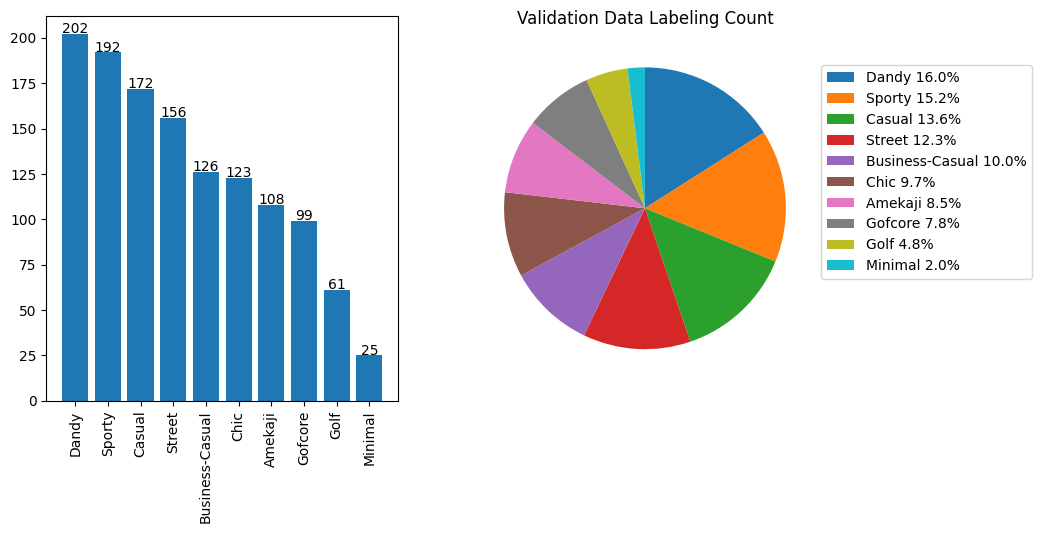

In [35]:
# 라벨 개수 카운트
label_count = {}

for item in y_val:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Validation Data Labeling Count")
plt.show()

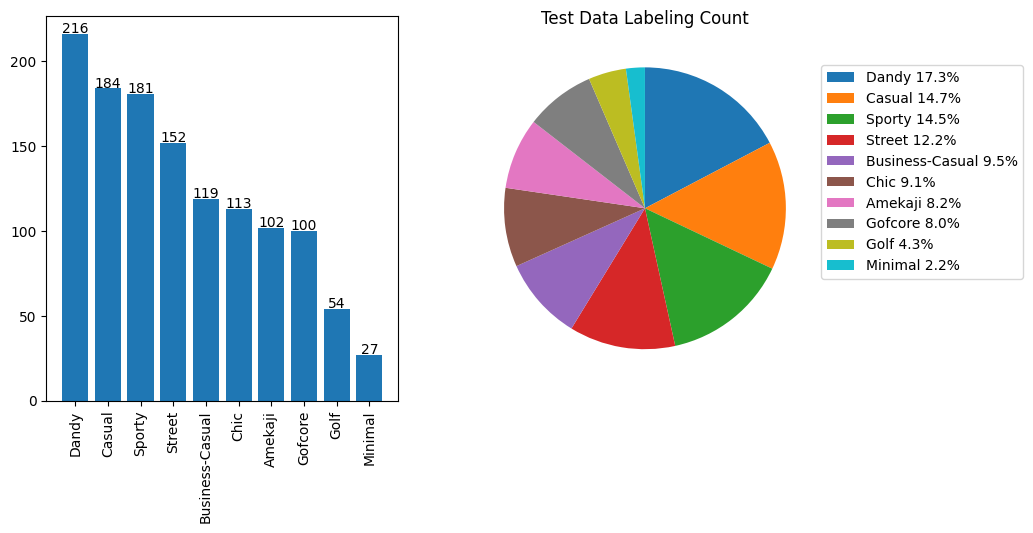

In [36]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# Train 데이터 어그멘테이션

In [ ]:
# 혹시 모르니 백업해두기
ori_x_train = x_train[:]
ori_y_train = y_train[:]

print(ori_x_train.shape)
print(ori_y_train.shape)

In [ ]:
print("Before length")
print(x_train.shape)
print(y_train.shape)
print()

# 변형을 위해 리스트로 변환
x_train = list(x_train)
y_train = list(y_train)

ori_len = len(x_train) # 계속 길이가 추가될 테니까 미리 계산
for i in range(0, ori_len):
  # 진행도 체크
  if (i+1)%1000 == 0:
    print(str(i+1) + "개 Train 데이터 적용 완료")

  # 90도 회전
  # rotate_90 = cv2.rotate(x_train[i], cv2.ROTATE_90_CLOCKWISE)
  # x_train.append(rotate_90)
  # y_train.append(y_train[i])

  # 180도 회전
  rotate_180 = cv2.rotate(x_train[i], cv2.ROTATE_180)
  x_train.append(rotate_180)
  y_train.append(y_train[i])

  # 270도 회전
  # rotate_270 = cv2.rotate(x_train[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
  # x_train.append(rotate_270)
  # y_train.append(y_train[i])


# 학습을 위해 다시 ndarray 형태로 변환
x_train = np.array(x_train)
y_train = np.array(y_train)

print()
print("Complete")
print("After length")
print(x_train.shape)
print(y_train.shape)

## 어그멘테이션 확인

In [ ]:
rand_num = random.randint(0, ori_len)
print("Random Number : ", rand_num)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(x_train[rand_num])
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(x_train[ori_len + (rand_num*3)])
plt.title("Rotate 90")

plt.subplot(1, 4, 3)
plt.imshow(x_train[ori_len + (rand_num*3) + 1])
plt.title("Rotate 180")

plt.subplot(1, 4, 4)
plt.imshow(x_train[ori_len + (rand_num*3) + 2])
plt.title("Rotate 270")

plt.show()

# 모델 생성

## 케라스 기본 모델들

In [ ]:
fashion_model = keras.applications.VGG16(include_top=True,
                                         weights=None,
                                         input_tensor=None,
                                         input_shape=(img_height, img_width, 3),
                                         pooling='max',
                                         classes=10,
                                         classifier_activation='softmax')

In [ ]:
fashion_model = keras.applications.VGG19(include_top=True,
                                         weights=None,
                                         input_tensor=None,
                                         input_shape=(img_height, img_width, 3),
                                         pooling='max',
                                         classes=10,
                                         classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet50(include_top=True,
                                            weights=None,
                                            input_tensor=None,
                                            input_shape=(img_height, img_width, 3),
                                            pooling='max',
                                            classes=10)

In [ ]:
fashion_model = keras.applications.ResNet101(include_top=True,
                                             weights=None,
                                             input_tensor=None,
                                             input_shape=(img_height, img_width, 3),
                                             pooling='max',
                                             classes=10,
                                             classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet152(include_top=True,
                                             weights=None,
                                             input_tensor=None,
                                             input_shape=(img_height, img_width, 3),
                                             pooling='max',
                                             classes=10,
                                             classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet50V2(include_top=True,
                                              weights=None,
                                              input_tensor=None,
                                              input_shape=(img_height, img_width, 3),
                                              pooling='max',
                                              classes=10,
                                              classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet101V2(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.ResNet152V2(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNet(input_shape=(img_height, img_width, 3),
                          alpha=1.0,
                          depth_multiplier=1,
                          dropout=0.001,
                          include_top=True,
                          weights=None,
                          input_tensor=None,
                          pooling='max',
                          classes=10,
                          classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               alpha=1.0,
                                               include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.MobileNetV3Small(input_shape=(img_height, img_width, 3),
                                                    alpha=1.0,
                                                    minimalistic=False,
                                                    include_top=True,
                                                    weights=None,
                                                    input_tensor=None,
                                                    classes=10,
                                                    pooling='max',
                                                    dropout_rate=0.2,
                                                    classifier_activation="softmax",
                                                    include_preprocessing=False)

In [ ]:
fashion_model = keras.applications.MobileNetV3Large(input_shape=(img_height, img_width, 3),
                                                    alpha=1.0,
                                                    minimalistic=False,
                                                    include_top=True,
                                                    weights=None,
                                                    input_tensor=None,
                                                    classes=10,
                                                    pooling='max',
                                                    dropout_rate=0.2,
                                                    classifier_activation="softmax",
                                                    include_preprocessing=False)

In [ ]:
fashion_model = keras.applications.DenseNet121(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.DenseNet169(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.DenseNet201(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.NASNetLarge(input_shape=(img_height, img_width, 3),
                                               include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.NASNetMobile(input_shape=(img_height, img_width, 3),
                                                include_top=True,
                                                weights=None,
                                                input_tensor=None,
                                                pooling='max',
                                                classes=10,
                                                classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.InceptionV3(include_top=True,
                                               weights=None,
                                               input_tensor=None,
                                               input_shape=(img_height, img_width, 3),
                                               pooling='max',
                                               classes=10,
                                               classifier_activation="softmax")

In [ ]:
fashion_model = keras.applications.InceptionResNetV2(include_top=True,
                                                     weights=None,
                                                     input_tensor=None,
                                                     input_shape=(img_height, img_width, 3),
                                                     pooling='max',
                                                     classes=10,
                                                     classifier_activation="softmax")

## VGGNet

In [ ]:
def Vgg():
  input_img = keras.layers.Input(shape=(img_height, img_width, 3))

  conv1 = keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_img)
  conv1 = keras.layers.Dropout(0.2)(conv1)
  conv1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
  pool1 = keras.layers.MaxPooling2D(2)(conv1)

  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
  conv2 = keras.layers.Dropout(0.2)(conv2)
  conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2)
  pool2 = keras.layers.MaxPooling2D(2)(conv2)

  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
  conv3 = keras.layers.Dropout(0.2)(conv3)
  conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3)
  pool3 = keras.layers.MaxPooling2D(2)(conv3)

  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool3)
  conv4 = keras.layers.Dropout(0.2)(conv4)
  conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
  pool4 = keras.layers.MaxPooling2D(2)(conv4)

  conv5 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool4)
  conv5 = keras.layers.Dropout(0.2)(conv5)
  conv5 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv5)
  pool5 = keras.layers.MaxPooling2D(2)(conv5)

  flat = keras.layers.Flatten()(pool5)

  dense1 = keras.layers.Dense(1000, activation='relu')(flat)
  dense1 = keras.layers.Dropout(0.2)(dense1)

  dense2 = keras.layers.Dense(1000, activation='relu')(dense1)
  dense2 = keras.layers.Dropout(0.2)(dense2)

  dense3 = keras.layers.Dense(1000, activation='relu')(dense2)
  dense3 = keras.layers.Dropout(0.2)(dense3)


  # 모델이 총 10개의 패션 타입을 분류하므로 마지막 층은 11개의 뉴런 설정
  output_label = keras.layers.Dense(10, activation='softmax', name='OutputLayer')(dense3)

  model = keras.Model(input_img, output_label)
  return model

## GoogLeNet

In [37]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4):
  # Input:
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = keras.layers.Conv2D(filters = f1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = keras.layers.Conv2D(filters = f2_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path2 = keras.layers.Conv2D(filters = f2_conv3, kernel_size = 3, padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = keras.layers.Conv2D(filters = f3_conv1, kernel_size = 1, padding = 'same', activation = 'relu')(input_layer)
  path3 = keras.layers.Conv2D(filters = f3_conv5, kernel_size = 5, padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = keras.layers.MaxPooling2D(3, strides = 1, padding = 'same')(input_layer)
  path4 = keras.layers.Conv2D(filters = f4, kernel_size = 1, padding = 'same', activation = 'relu')(path4)

  output_layer = keras.layers.concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [38]:
def GoogLeNet():
  # input layer
  input_layer = keras.layers.Input(shape = (img_height, img_width, 3))

  # Inception layers
  X = keras.layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, padding = 'valid', activation = 'relu')(input_layer)
  # X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2)(X)
  X = keras.layers.Conv2D(filters = 64, kernel_size = 1, strides = 1, padding = 'same', activation = 'relu')(X)
  X = keras.layers.Conv2D(filters = 192, kernel_size = 3, padding = 'same', activation = 'relu')(X)
  X = keras.layers.MaxPooling2D(pool_size= 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)
  X = keras.layers.MaxPooling2D(pool_size= 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2)(X)
  # dropout 추가
  # X = keras.layers.Dropout(0.2)(X)

  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # 임의로 추가
  # X = keras.layers.MaxPooling2D(pool_size = 3, strides = 2, name="Addition")(X)
  # X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  # X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer
  X = keras.layers.GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer
  X = keras.layers.Dropout(0.4)(X)

  # Dense layer. 쓸모 있을지는 모르겠다
  X = keras.layers.Dense(1000, activation='relu')(X)
  X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Dense(1000, activation='relu')(X)

  # output layer
  # 모델이 총 10개의 패션 타입을 분류하므로 마지막 층은 10개의 뉴런 설정
  output_layer = keras.layers.Dense(10, activation='softmax', name='OutputLayer')(X)

  # model 정의
  model = keras.Model(input_layer, output_layer, name = 'GoogLeNet')

  return model

## 모델 설정

In [39]:
# fashion_model = Vgg()
fashion_model = GoogLeNet()

In [40]:
# adam learning_rate 기본값 0.001
adam = keras.optimizers.Adam(learning_rate=0.00002)
fashion_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [41]:
fashion_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 47, 47, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 47, 47, 64)           4160      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 47, 47, 192)          110784    ['conv2d_1[0][0]']            
                                                                                          

In [ ]:
# 모델 구조 시각화
# keras.utils.plot_model(fashion_model, show_shapes=True)

## 중간까지 학습한 모델을 다시 불러올 경우

In [ ]:
saved_model_path = model_dir_name + 'fashion_classification_male_0815_03.keras'

fashion_model = keras.models.load_model(saved_model_path)

In [ ]:
fashion_model.summary()

## 모델이 덮어쓰기되지 않도록 이름 잊지말고 바꿔주기

In [42]:
fashion_model_path = model_dir_name + 'fashion_classification_male_1005_03_onepiece.keras'

# 모델 학습

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(fashion_model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [44]:
history = fashion_model.fit(x_train, y_train,
                            epochs=50, verbose=1,
                            validation_data=(x_val, y_val),
                            callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
119/119 [==============================] - 49s 170ms/step - loss: 2.2267 - sparse_categorical_accuracy: 0.1522 - val_loss: 2.1853 - val_sparse_categorical_accuracy: 0.1709
Epoch 2/50
119/119 [==============================] - 11s 89ms/step - loss: 2.1877 - sparse_categorical_accuracy: 0.1781 - val_loss: 2.1557 - val_sparse_categorical_accuracy: 0.2168
Epoch 3/50
119/119 [==============================] - 10s 87ms/step - loss: 2.1582 - sparse_categorical_accuracy: 0.1928 - val_loss: 2.1355 - val_sparse_categorical_accuracy: 0.2002
Epoch 4/50
119/119 [==============================] - 10s 80ms/step - loss: 2.1319 - sparse_categorical_accuracy: 0.2073 - val_loss: 2.1926 - val_sparse_categorical_accuracy: 0.1804
Epoch 5/50
119/119 [==============================] - 11s 92ms/step - loss: 2.1110 - sparse_categorical_accuracy: 0.2210 - val_loss: 2.1039 - val_sparse_categorical_accuracy: 0.2215
Epoch 6/50
119/119 [==============================] - 10s 87ms/step - loss: 2.1063 - spar

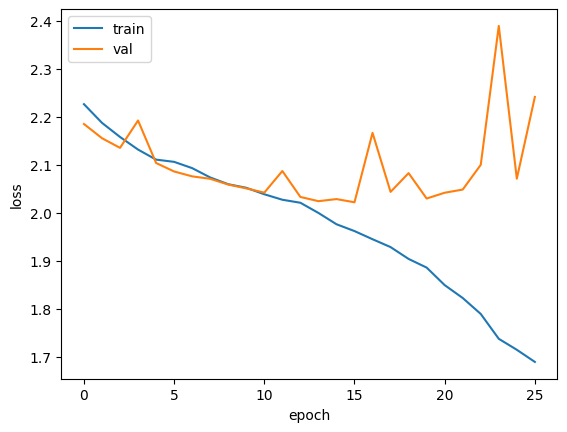

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

In [46]:
saved_model_path = model_dir_name + 'fashion_classification_male_1005_03_onepiece.keras'

saved_model = keras.models.load_model(saved_model_path)

In [47]:
saved_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 47, 47, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 47, 47, 64)           4160      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 47, 47, 192)          110784    ['conv2d_1[0][0]']            
                                                                                          

## 1개 Test 데이터 예측결과 확인

In [48]:
y_test.shape

(1248,)

In [49]:
num = random.randint(0, 1248)
print("Random Number : ", num)

preds = saved_model.predict(x_test[num:num+1])
type(preds)

Random Number :  1109
1/1 [==============================] - 2s 2s/step


numpy.ndarray

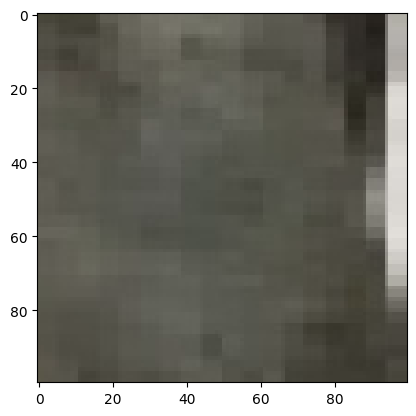

True Label :  Casual
Pred Label :  Casual


In [50]:
true_label = label_name[y_test[num]]
pred_label = label_name[np.argmax(preds)]

plt.imshow(x_test[num])
plt.show()

print('True Label : ', true_label)
print('Pred Label : ', pred_label)

## 전체 Test 데이터 정확도 확인

In [51]:
 saved_model.evaluate(x_test, y_test)

39/39 [==============================] - 1s 23ms/step - loss: 2.0283 - sparse_categorical_accuracy: 0.2812


[2.02833890914917, 0.28125]

# 유사 이미지 출력

In [ ]:
# 레이어 이름을 알기 위해
saved_model.summary()

In [ ]:
# 라벨 출력 직전 레이어 이름
last_layer_name = 'GAPL'

# 마지막 conv층 레이어 이름
last_conv_name = 'concatenate_8'

In [ ]:
class FeatureExtractor:
  def __init__(self):
    self.model = keras.Model(inputs=saved_model.input, outputs=saved_model.get_layer(last_layer_name).output)

  def summary(self):
    self.model.summary()

  def extract(self, img):
    # 이미지는 이미 200x200 사이즈로 입력
    x = np.expand_dims(img, axis=0) # 입력 차원을 맞추기 위해
    feature = self.model.predict(x, verbose=0)[0]
    return feature / np.linalg.norm(feature)


In [ ]:
feature_model = FeatureExtractor()
feature_model.summary()

# 이미지 Feature 정보 추출

In [ ]:
fe_original = []

for i in range(0, len(x_test)):
  feature = feature_model.extract(x_test[i])

  fe_original.append(feature)

  if (i+1)%500 == 0: # 진행도 확인용
    print(str(i+1) + "개 feature 추출 완료")

print("Complete")

# 랜덤 Test 데이터 불러오기

In [ ]:
y_test.shape

In [ ]:
num = random.randint(0, 4900)
print("Random Number : ", num)

preds = saved_model.predict(x_test[num:num+1])
type(preds)

In [ ]:
true_label = label_name[y_test[num]]
pred_label = label_name[np.argmax(preds)]

similar_img = x_test[num]
plt.imshow(similar_img)
plt.show()

print('True Label : ', true_label)
print('Pred Label : ', pred_label)

# 유사 이미지 탐색

In [ ]:
# 테스트 이미지에서 feature 추출
query = feature_model.extract(similar_img)

# 축적 데이터셋의 feature와 비교
dists = np.linalg.norm(fe_original - query, axis=1)

# 유사도가 높은 상위 20개 이미지의 index 추출
ids = np.argsort(dists)[:20]

print(ids.shape)

In [ ]:
print(ids)

In [ ]:
sub_pred_list = []

for i in ids:
  preds = saved_model.predict(x_test[i:i+1])
  sub_pred_label = label_name[np.argmax(preds)]
  sub_pred_list.append(sub_pred_label)

print(sub_pred_list)

# 결과 출력

In [ ]:
similar_rgb = cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB)


# 입력 이미지 출력
plt.imshow(similar_rgb)
plt.title("True : " + true_label + " / Pred : " + pred_label)
plt.show()

# 유사 이미지 출력
axes = []
fig = plt.figure(figsize=(10,10))
for i in range(20):
    dist = dists[ids[i]]

    axes.append(fig.add_subplot(4, 5, i+1))
    sub_true_label = label_name[y_test[ids[i]]]
    subplot_title = 'dist:' + str(round(dist,4)) + " / " + sub_true_label + " / " + sub_pred_list[i]
    axes[-1].set_title(subplot_title, fontsize=8)
    axes[-1].axis('off')
    plt.axis('off')
    sub_rgb = cv2.cvtColor(x_test[ids[i]], cv2.COLOR_BGR2RGB)
    plt.imshow(sub_rgb)

fig.tight_layout()
plt.show()

## GRAD-CAM 히트맵 생성

In [ ]:
# 입력: 이미지 array, 모델, 모델의 마지막 conv 레이어 이름
# 출력: heatmap array
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    heatmap_array = []

    # 마지막 feature maps에 대한 모델의 미분을 계산하기위해,
    # 마지막 feature maps와 모델의 최종예측값을 동시에 출력하는 모델을 새롭게 정의
    # 출력 형태에 last_conv_layer의 output이 새로 추가되었다
    grad_model = keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    for i in range(0, len(img_array)):
      # 모델에 이미지를 입력하고, 마지막 feature maps와 최종 예측값을 구하는 연산과정을
      # Computational graph라는 형태로 저장한다. 미분값을 계산하기 위함이다.
      with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array[i:i+1])
          # 미분(더 정확히는 그레디언트)는 한 개의 예측값에 대해서 계산할 수 있기 때문에
          # 가장 확률값이 큰 예측값에 대응하는 클래스 (혹은 함수의 인자로 전달한 클래스)만을 고려할 것이다. -> class_channel
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          class_channel = preds[:, pred_index]

      # 모델의 어떤 한 클래스에 대한 예측값(class_channel)을 마지막 feature maps(last_conv_layer_output)으로 미분한다.
      grads = tape.gradient(class_channel, last_conv_layer_output)

      # 마지막 feature maps은 여러 개의 채널을 갖고 있다. [데이터 개수, 높이, 너비, 채널]
      # 각 채널마다 등장한 미분값들을 평균 내려주자. (채널의 중요도를 결정)
      pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

      # 우리는 마지막 feature maps에서 중요한 위치를 알고 싶다.
      # 하지만 채널 개수가 많기 때문에 어떤 위치가 중요한지 결정해줘야 한다.
      # 채널의 중요도를 가중치로 가중합을 해주자 ([높이, 너비, 1]가 됨)
      last_conv_layer_output = last_conv_layer_output[0]
      # @는 행렬곱 연산이다. 축을 잘 맞춰줌으로써 행렬곱이 곧 가중합 연산이 되도록 한 것이다.
      heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
      heatmap = tf.squeeze(heatmap)  # 축 쥐어짜서 (squeeze) 없애주기 ([높이, 너비, 1] -> [높이, 너비]가 됨)

      # 0과 1사이 값으로 만들어주기
      heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
      heatmap_array.append(heatmap.numpy())


    return heatmap_array

In [ ]:
sub_img_list = []

for i in range(0, len(ids)):
  sub_img_list.append(x_test[ids[i]])

sub_img_list = np.array(sub_img_list)
print("Complete")

In [ ]:
sub_heatmap = make_gradcam_heatmap(sub_img_list, saved_model, last_conv_name)

print(type(sub_heatmap))

In [ ]:
len(sub_heatmap)

In [ ]:
tmp_list = [similar_img]
tmp_array = np.array(tmp_list)

input_heatmap_list = make_gradcam_heatmap(tmp_array, saved_model, last_conv_name)
input_heatmap = input_heatmap_list[0]

input_heatmap_rgb = np.uint8(255 * input_heatmap) # 히트맵의 0~1값을 0~255값으로 변환
input_heatmap_rgb = cv2.applyColorMap(input_heatmap_rgb , cv2.COLORMAP_JET)
input_heatmap_rgb = cv2.cvtColor(input_heatmap_rgb, cv2.COLOR_BGR2RGB)
input_heatmap_rgb = cv2.resize(input_heatmap_rgb, (img_width , img_height))

input_imposed_img = cv2.addWeighted(similar_rgb, 0.5, input_heatmap_rgb, 0.5, 0)
input_imposed_img = np.uint8(input_imposed_img)

plt.imshow(input_imposed_img)
plt.show()

In [ ]:
sub_imposed_list = []

for i in range(0, len(sub_heatmap)):
  rgb_heatmap = np.uint8(255 * sub_heatmap[i]) # 히트맵의 0~1값을 0~255값으로 변환
  rgb_heatmap = cv2.applyColorMap(rgb_heatmap , cv2.COLORMAP_JET)
  rgb_heatmap = cv2.cvtColor(rgb_heatmap, cv2.COLOR_BGR2RGB)
  rgb_heatmap = cv2.resize(rgb_heatmap, (img_width , img_height))

  sub_img_rgb = cv2.cvtColor(sub_img_list[i], cv2.COLOR_BGR2RGB)
  superimposed_img = cv2.addWeighted(sub_img_rgb, 0.5, rgb_heatmap, 0.5, 0)
  superimposed_img = np.uint8(superimposed_img)

  sub_imposed_list.append(superimposed_img)

print("Complete")
print(len(sub_imposed_list))

In [ ]:
# 입력 이미지 출력
plt.imshow(input_imposed_img)
plt.title("True : " + true_label + " / Pred : " + pred_label)
plt.show()

# 유사 이미지들 GRAD-CAM 출력
axes = []
fig = plt.figure(figsize=(10,10))
for i in range(20):
    dist = dists[ids[i]]

    axes.append(fig.add_subplot(4, 5, i+1))
    sub_true_label = label_name[y_test[ids[i]]]
    subplot_title = 'dist:' + str(round(dist,4)) + " / " + sub_true_label + " / " + sub_pred_list[i]
    axes[-1].set_title(subplot_title, fontsize=8)
    axes[-1].axis('off')
    plt.axis('off')
    plt.imshow(sub_imposed_list[i])

fig.tight_layout()
plt.show()